In [26]:
from pandas import read_csv, concat
from matplotlib import pyplot as plt

import seaborn as sns
import numpy as np
import os


In [3]:
data_folder = "../../data/prepared_data/"

os.listdir(data_folder)

['unpd_combined_indicators.csv',
 'gbd_world_pop.csv',
 'date_for_8bn.csv',
 'gbd_scenarios_pop.csv',
 'unpd_world_indicators.csv',
 'gbd_world_births.csv']

In [78]:
dates_8bn = read_csv(data_folder + "date_for_8bn.csv")
gbd_scenarios_pop = read_csv(data_folder + "gbd_scenarios_pop.csv")
unpd_combined_indicators = read_csv(data_folder + "unpd_combined_indicators.csv")
unpd_combined_indicators["val"] = unpd_combined_indicators.TPopulation1July*1_000

In [79]:
dates_8bn = dates_8bn.loc[:,["scenario_name","year_id"]]
dates_8bn

,scenario_name,year_id
0,High,2068
1,Low,2131
2,Medium,2083
3,Reference,2095
4,SDG Met Need and Education,2126


In [80]:
un_matched_dates = dates_8bn\
    .merge(unpd_combined_indicators,
           "left",
           left_on=["scenario_name","year_id"],
           right_on=["Variant","Time"])\
    .loc[:,["scenario_name","year_id","val"]]

In [81]:
unpd_combined_indicators.columns

Index(['Unnamed: 0', 'SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code',
       'SDMX_code', 'LocTypeID', 'LocTypeName', 'ParentID', 'Location',
       'VarID', 'Variant', 'Time', 'TPopulation1Jan', 'TPopulation1July',
       'TPopulationMale1July', 'TPopulationFemale1July', 'PopDensity',
       'PopSexRatio', 'MedianAgePop', 'NatChange', 'NatChangeRT', 'PopChange',
       'PopGrowthRate', 'DoublingTime', 'Births', 'Births1519', 'CBR', 'TFR',
       'NRR', 'MAC', 'SRB', 'Deaths', 'DeathsMale', 'DeathsFemale', 'CDR',
       'LEx', 'LExMale', 'LExFemale', 'LE15', 'LE15Male', 'LE15Female', 'LE65',
       'LE65Male', 'LE65Female', 'LE80', 'LE80Male', 'LE80Female',
       'InfantDeaths', 'IMR', 'LBsurvivingAge1', 'Under5Deaths', 'Q5', 'Q0040',
       'Q0040Male', 'Q0040Female', 'Q0060', 'Q0060Male', 'Q0060Female',
       'Q1550', 'Q1550Male', 'Q1550Female', 'Q1560', 'Q1560Male',
       'Q1560Female', 'NetMigrations', 'CNMR', 'BirthsSingle', 'val'],
      dtype='object')

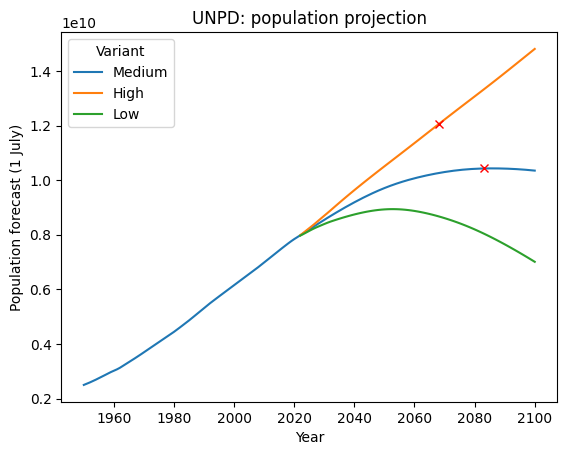

In [84]:
sns.lineplot(data=unpd_combined_indicators[unpd_combined_indicators.Location=="World"],
             x="Time",
             y="val",
             hue="Variant")
plt.title("UNPD: population projection")
plt.xlabel("Year")
plt.ylabel("Population forecast (1 July)")
plt.plot(un_matched_dates.year_id, un_matched_dates.val, "rx")
plt.show()

In [85]:
gbd_matched_dates = dates_8bn.loc[:,["scenario_name","year_id"]]\
    .merge(gbd_scenarios_pop[gbd_scenarios_pop.location_name=="Global"],
           "left",
           left_on=["scenario_name","year_id"],
           right_on=["scenario_name","year_id"])\
    .loc[:,["scenario_name","year_id","val"]]

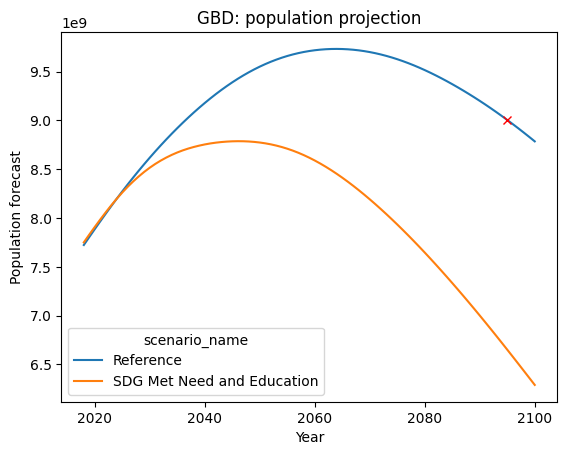

In [86]:
sns.lineplot(data=gbd_scenarios_pop[gbd_scenarios_pop.location_name=="Global"],
             x="year_id",
             y="val",
             hue="scenario_name")
plt.title("GBD: population projection")
plt.xlabel("Year")
plt.ylabel("Population forecast")
plt.plot(gbd_matched_dates.year_id, gbd_matched_dates.val, "rx")
plt.show()

In [87]:
gbd_scenarios_pop.columns

Index(['Unnamed: 0', 'location_id', 'location_name', 'sex_id', 'sex',
       'age_group_id', 'age_group_name', 'year_id', 'measure_id',
       'measure_name', 'metric_id', 'metric_name', 'scenario', 'scenario_name',
       'val', 'upper', 'lower'],
      dtype='object')

In [88]:
gbd_matched_dates

,scenario_name,year_id,val
0,High,2068,NaN
1,Low,2131,NaN
2,Medium,2083,NaN
3,Reference,2095,9.004754e+09
4,SDG Met Need and Education,2126,NaN


In [91]:
df_comb = concat([
    unpd_combined_indicators[unpd_combined_indicators.Location=="World"]\
        .rename(
            columns={
                "Time":"year_id",
                "Variant":"scenario_name"
            }).loc[:, ["year_id","val","scenario_name"]],
    gbd_scenarios_pop[gbd_scenarios_pop.location_name=="Global"].loc[:, ["year_id","val","scenario_name"]]
]).reset_index()

In [92]:
df_comb[df_comb.year_id==df_comb.year_id.min()]

,index,year_id,val,scenario_name
0,0,1950,2.499322e+09,Medium


In [111]:
df_comb

gbd_tmp = gbd_matched_dates[gbd_matched_dates.val.notna()]
x_gbd, y_gbd = list(gbd_tmp.year_id), list(gbd_tmp.val)

un_tmp = un_matched_dates[un_matched_dates.val.notna()]
x_un, y_un = list(un_tmp.year_id), list(un_tmp.val)
x_tot, y_tot = x_un + x_gbd, y_un + y_gbd

In [110]:
x_gbd

[2095]

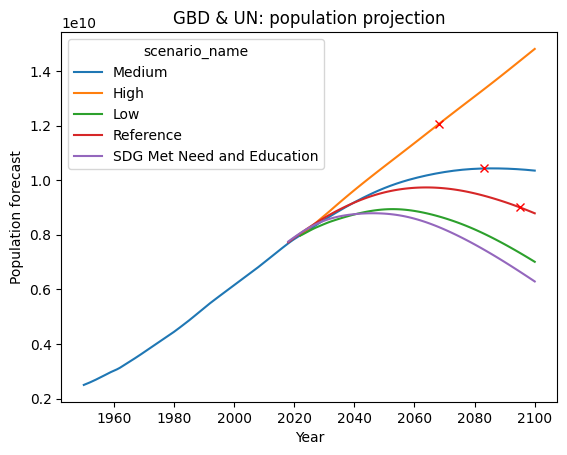

In [112]:

sns.lineplot(data=df_comb,
             x="year_id",
             y="val",
             hue="scenario_name")
plt.title("GBD & UN: population projection")
plt.xlabel("Year")
plt.ylabel("Population forecast")
plt.plot(x_tot, y_tot, "rx")
plt.show()

In [113]:
df_e4a = read_csv("../../data/prepared_data/e4a.csv")

In [119]:
df_e4a["scenario_name"] = "E4A"
df_e4a_schemad = df_e4a.rename(columns={"Year":"year_id","Population":"val"})\
    .loc[:,["year_id", "val", "scenario_name"]]

In [126]:
df_all = concat([
    df_comb.loc[:,["year_id", "val", "scenario_name"]],
    df_e4a_schemad
]).reset_index()

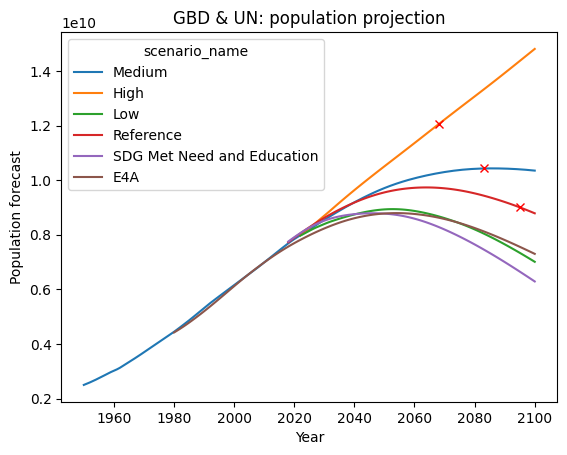

In [127]:
sns.lineplot(data=df_all,
             x="year_id",
             y="val",
             hue="scenario_name")
plt.title("GBD & UN: population projection")
plt.xlabel("Year")
plt.ylabel("Population forecast")
plt.plot(x_tot, y_tot, "rx")
plt.show()